# TITLE

Thinking about why leave points cut off so quickly
reporting time it took to do the task, velocity
checker for outliers-- one point super far from point before and point after

In [114]:
%matplotlib inline

import os
import matplotlib.pyplot as plt


# Import local code
import sys
sys.path.append(os.getcwd().replace('notebooks', 'module'))

from utils import *

In [115]:
# #because above isn't working--DELETE LATER
# import math

# import pandas as pd
# def load_posyx_file(f_name):
#     """Helper function to load data."""

#     # Update this list to specify which columns you want to keep
#     keep_cols = ['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency']

#     # Load the data
#     df = pd.read_json(f_name, lines=True, orient='records')

#     # Grab the data column, unpack and add all the embedded jsons
#     data_df = pd.read_json(df.pop('data').to_json(), orient='index')
#     for col in ['coordinates', 'metrics', 'orientation']:
#         temp = pd.read_json(data_df[col].to_json(), orient='index')
#         df = pd.concat([df, temp], axis=1, join_axes=[df.index])

#     # Select columns to return
#     df = df[keep_cols]

#     return df

## Settings

In [116]:
subj_ind = 13

## Loading data

In [117]:
# Create the path to the data (assume the Github repo, but works on any computer)
dat_path = os.getcwd().replace('notebooks', 'data')
# Note: this also works, but looks like nonsense. 
#dat_path = '/'.join(os.getcwd().split('/')[0:-1]) + '/data/'

In [118]:
# Check all data files
all_files = os.listdir(dat_path)
subj_files = [file for file in all_files if 'subj' in file]
print(subj_files)

# Create full subj data path
subj_dat_path = os.path.join(dat_path, subj_files[subj_ind])

['subj_1.json', 'subj_10.json', 'subj_11.json', 'subj_12.json', 'subj_13.json', 'subj_14.json', 'subj_15.json', 'subj_16.json', 'subj_17.json', 'subj_18.json', 'subj_19.json', 'subj_2.json', 'subj_20.json', 'subj_21.json', 'subj_22.json', 'subj_23.json', 'subj_24.json', 'subj_3.json', 'subj_4.json', 'subj_5.json', 'subj_6.json', 'subj_8.json', 'subj_9.json']


In [119]:
# Load the data
df = load_posyx_file(subj_dat_path)

In [120]:
df.head()

,tagId,timestamp,x,y,z,latency
0,26395,2019-05-30 01:20:26.117000103,NaN,NaN,NaN,NaN
1,26382,2019-05-30 01:20:26.440999985,NaN,NaN,NaN,NaN
2,26383,2019-05-30 01:20:26.812999964,3666.0,5401.0,0.0,81.8
3,26457,2019-05-30 01:20:26.904000044,7880.0,8065.0,0.0,156.7
4,26395,2019-05-30 01:20:27.085000038,NaN,NaN,NaN,NaN


In [121]:
# Check how many tags there are, and their IDs
tags = set(df['tagId'].values)
print('There are {} tags'.format(len(tags)))
print('The tag IDs are: {}'.format(*tags))

There are 4 tags
The tag IDs are: 26457


In [122]:
# Use a dictionary to label tags
tag_dict = {'participant' : 26382, 
            'local' : 26457}

In [123]:
# Example: Use the lab dictionary to loop through the raw data, and grab data from a specific tag
for person in tag_dict.keys():
    print(person)
    print(df[df['tagId'] == tag_dict[person]].head())
    print('\n')

participant
    tagId                     timestamp       x       y    z  latency
1   26382 2019-05-30 01:20:26.440999985     NaN     NaN  NaN      NaN
5   26382 2019-05-30 01:20:27.407999992  3129.0  6802.0  0.0     94.3
9   26382 2019-05-30 01:20:28.171000004  4414.0  6706.0  0.0     79.7
13  26382 2019-05-30 01:20:28.869999886  5262.0  6465.0  0.0     82.4
17  26382 2019-05-30 01:20:29.661000013  6690.0  6082.0  0.0     78.9


local
    tagId                     timestamp       x       y    z  latency
3   26457 2019-05-30 01:20:26.904000044  7880.0  8065.0  0.0    156.7
7   26457 2019-05-30 01:20:27.634999990  7824.0  8098.0  0.0    144.5
11  26457 2019-05-30 01:20:28.348000050  7736.0  8074.0  0.0    138.6
15  26457 2019-05-30 01:20:29.071000099  7878.0  8134.0  0.0    147.9
19  26457 2019-05-30 01:20:29.835999966  7672.0  8089.0  0.0    231.9




In [124]:
#Create dataframes my own way for easier access right now
dfParticipant = df[df['tagId']== 26382]
dfLocal = df[df['tagId']== 26475]

In [125]:
dfParticipant = dfParticipant.dropna()
dfParticipant

,tagId,timestamp,x,y,z,latency
5,26382,2019-05-30 01:20:27.407999992,3129.0,6802.0,0.0,94.3
9,26382,2019-05-30 01:20:28.171000004,4414.0,6706.0,0.0,79.7
13,26382,2019-05-30 01:20:28.869999886,5262.0,6465.0,0.0,82.4
17,26382,2019-05-30 01:20:29.661000013,6690.0,6082.0,0.0,78.9
21,26382,2019-05-30 01:20:30.430000067,6753.0,5158.0,0.0,82.3
609,26382,2019-05-30 01:22:27.573999882,0.0,0.0,0.0,102.7
613,26382,2019-05-30 01:22:28.063999891,0.0,0.0,0.0,80.8
617,26382,2019-05-30 01:22:28.509000063,21729.0,-11573.0,0.0,83.8
633,26382,2019-05-30 01:22:31.862999916,16977.0,-10178.0,0.0,82.4
641,26382,2019-05-30 01:22:33.081000090,15294.0,-9417.0,0.0,92.6


In [126]:
#Create a function to make dataframes for the participant's leaving and returning from the hallway

def createExperimentDfs(participant_df):
    leave_df = pd.DataFrame(columns=['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency'])
    return_df = pd.DataFrame(columns=['tagId', 'timestamp', 'success', 'x', 'y', 'z', 'latency'])
    index1 = participant_df.index[0]
    index2 = 0
    marker = 0
    df_to_append = 0
    for index, row in participant_df.iterrows():
        index2 = participant_df.index[marker]
        
        if (index2 - index1 <= 2 and df_to_append == 0):
            leave_df = leave_df.append(row)
            
        elif (index2 - index1 <= 2 and df_to_append == 1):
            return_df = return_df.append(row)
            
        elif (index2 - index1 > 500):
            df_to_append = 1
        
        else:
            if (df_to_append == 0):
                leave_df = leave_df.append(row)
                #leave_df.set_value[index, 'consecutive', 'False']
            else :
                return_df = return_df.append(row)
                #return_df.set_value[index, 'consecutive', 'False']
                
        index1 = participant_df.index[marker]
        marker = marker + 1
    return leave_df, return_df

In [127]:
participant_leave, participant_return = createExperimentDfs(dfParticipant)

In [128]:
participant_leave

,tagId,timestamp,success,x,y,z,latency
5,26382,2019-05-30 01:20:27.407999992,NaN,3129.0,6802.0,0.0,94.3
9,26382,2019-05-30 01:20:28.171000004,NaN,4414.0,6706.0,0.0,79.7
13,26382,2019-05-30 01:20:28.869999886,NaN,5262.0,6465.0,0.0,82.4
17,26382,2019-05-30 01:20:29.661000013,NaN,6690.0,6082.0,0.0,78.9
21,26382,2019-05-30 01:20:30.430000067,NaN,6753.0,5158.0,0.0,82.3


In [129]:
participant_return

,tagId,timestamp,success,x,y,z,latency
613,26382,2019-05-30 01:22:28.063999891,NaN,0.0,0.0,0.0,80.8
617,26382,2019-05-30 01:22:28.509000063,NaN,21729.0,-11573.0,0.0,83.8
633,26382,2019-05-30 01:22:31.862999916,NaN,16977.0,-10178.0,0.0,82.4
641,26382,2019-05-30 01:22:33.081000090,NaN,15294.0,-9417.0,0.0,92.6
649,26382,2019-05-30 01:22:34.321000099,NaN,14046.0,-8337.0,0.0,79.8
653,26382,2019-05-30 01:22:34.779000044,NaN,13294.0,-7981.0,0.0,79.8
657,26382,2019-05-30 01:22:35.240999937,NaN,12817.0,-7451.0,0.0,78.6
661,26382,2019-05-30 01:22:35.767999887,NaN,12301.0,-6961.0,0.0,96.9
665,26382,2019-05-30 01:22:36.239000082,NaN,11824.0,-6390.0,0.0,81.8
677,26382,2019-05-30 01:22:38.012000084,NaN,10296.0,-4189.0,0.0,82.1


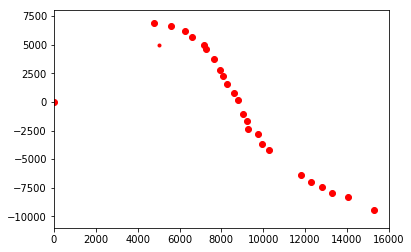

In [134]:
plt.figure()
plt.plot(participant_return.x, participant_return.y, '.', color='red', ms=12)
plt.plot(5000, 5000, 'r.')
plt.xlim([0,16000])
plt.ylim([-11000,8000]);
plt.savefig('FileName.png')

In [ ]:
hhh